## Importing dataset


In [71]:
from sklearn.datasets import fetch_openml



In [72]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]


In [73]:
X.shape


(70000, 784)

In [74]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [75]:
%matplotlib inline

In [76]:
import matplotlib
import matplotlib.pyplot as plt

In [77]:
some_digit_1=X[36001]
some_digit_image=some_digit_1.reshape(28,28)   #reshape it to plot it

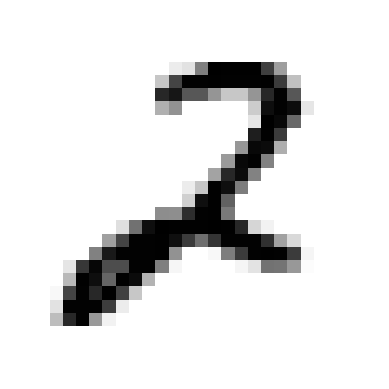

In [78]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [79]:
some_digit_2=X[1621]
some_digit_image_2=some_digit_2.reshape(28,28)   #reshape it to plot it

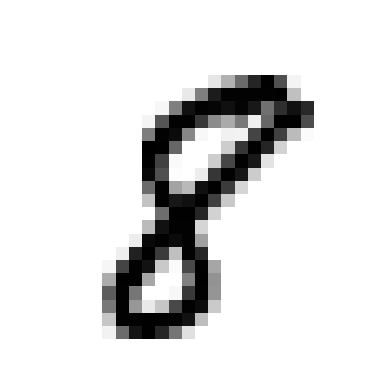

In [80]:
plt.imshow(some_digit_image_2, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [81]:
y[3601]  #lable of image

'8'

## Splitting data into train and test data part

In [82]:
X_train,X_test=X[:6000],X[6000:10000]  #train and test part of X dataset

In [83]:
y_train,y_test=y[:6000],y[6000:10000]  #train and test part of y 

## Data permutation

In [84]:
import numpy as np
shuffle_index=np.random.permutation(6000)
X_train,y_train,=X_train[shuffle_index],y_train[shuffle_index]

In [85]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)


In [86]:
y_train

array([4, 3, 4, ..., 3, 7, 4], dtype=int8)

In [87]:
y_test

array([6, 0, 1, ..., 6, 9, 7], dtype=int8)

## Training Model 

In [88]:
from sklearn.linear_model import LogisticRegression

In [97]:
clf = LogisticRegression(tol=0.1,max_iter=200, solver="lbfgs")

In [98]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=200, tol=0.1)

In [103]:
# Predict any sample as 0–9 digit
print("Prediction for some_digit_1:", clf.predict([some_digit_1])[0])
print("Prediction for some_digit_2:", clf.predict([some_digit_2])[0])


Prediction for some_digit_1: 2
Prediction for some_digit_2: 8


array([8], dtype=int8)

## Accuracy of Model 

In [104]:
# ## Accuracy for multiclass model
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Multiclass Accuracy (0–9):", acc)


Multiclass Accuracy (0–9): 0.86825


## Cross validation of model

In [105]:
# Cross Validation for Multiclass Model
from sklearn.model_selection import cross_val_score

acc_scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

print("Cross-validated accuracy:", acc_scores.mean())


Cross-validated accuracy: 0.8736666666666667
